# Limpieza de datos

Primero importamos librerias y datos.

In [1]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt    # import matplotlib.pyplot as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [3]:
#cargamos datos

import pandas as pd
actor = pd.read_csv('../data/actor.csv')
category = pd.read_csv('../data/category.csv')
film = pd.read_csv('../data/film.csv')
inventory = pd.read_csv('../data/inventory.csv')
language = pd.read_csv('../data/language.csv')
old_HDD = pd.read_csv('../data/old_HDD.csv')
rental = pd.read_csv('../data/rental.csv')

In [4]:
#función para visualizar datos nulos

def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña el % de valores nulos y lo grafica"""
    
    nan_cols = df.isna().mean() * 100  # porcentaje de nulo en cada columna
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))     # inicia la figura y establece el tamaño
    sns.heatmap(df.isna(),          # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',     # mapa de color
                cbar=False,         # sin barra lateral
               )


    plt.show();

**Exploración inicial**

Comenzamos la exploración, visualizando los datos en tablas

**1. Actor**

In [5]:
#para ver la dimensión de la tabla
actor.shape

(200, 4)

In [6]:
#observamos las columnas para ver si hay que cambiar títulos de  columnas para unifica o simplificar
actor.columns

Index(['actor_id', 'first_name', 'last_name', 'last_update'], dtype='object')

In [7]:
actor.value_counts()

actor_id  first_name  last_name    last_update        
1         PENELOPE    GUINESS      2006-02-15 04:34:33    1
138       LUCILLE     DEE          2006-02-15 04:34:33    1
128       CATE        MCQUEEN      2006-02-15 04:34:33    1
129       DARYL       CRAWFORD     2006-02-15 04:34:33    1
130       GRETA       KEITEL       2006-02-15 04:34:33    1
                                                         ..
70        MICHELLE    MCCONAUGHEY  2006-02-15 04:34:33    1
71        ADAM        GRANT        2006-02-15 04:34:33    1
72        SEAN        WILLIAMS     2006-02-15 04:34:33    1
73        GARY        PENN         2006-02-15 04:34:33    1
200       THORA       TEMPLE       2006-02-15 04:34:33    1
Length: 200, dtype: int64

In [8]:
#vista general

actor.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   actor_id     200 non-null    int64 
 1   first_name   200 non-null    object
 2   last_name    200 non-null    object
 3   last_update  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 41.0 KB


In [9]:
#vemos la tabla para ver el contenido
actor.head()


,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


In [10]:
#comprobamos si no hay duplicados
actor.drop_duplicates().shape == actor.shape  

True

In [11]:
#la columna last_updated es la fecha de la última actualización de la tabla y la vamos a pasar a formato de fecha

actor["last_update"] = pd.to_datetime(actor["last_update"])

In [12]:
# después de revisar los datos y comprobar que last_update no nos va a servir para la reapertura del proyecto, lo borramos

actor.drop('last_update', axis=1, inplace=True)


In [13]:
#comprobamos 
actor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   actor_id    200 non-null    int64 
 1   first_name  200 non-null    object
 2   last_name   200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


**2. Category**


In [14]:
category.shape

(16, 3)

In [15]:
category.columns

Index(['category_id', 'name', 'last_update'], dtype='object')

In [16]:
category.value_counts()

category_id  name         last_update        
1            Action       2006-02-15 04:46:27    1
2            Animation    2006-02-15 04:46:27    1
3            Children     2006-02-15 04:46:27    1
4            Classics     2006-02-15 04:46:27    1
5            Comedy       2006-02-15 04:46:27    1
6            Documentary  2006-02-15 04:46:27    1
7            Drama        2006-02-15 04:46:27    1
8            Family       2006-02-15 04:46:27    1
9            Foreign      2006-02-15 04:46:27    1
10           Games        2006-02-15 04:46:27    1
11           Horror       2006-02-15 04:46:27    1
12           Music        2006-02-15 04:46:27    1
13           New          2006-02-15 04:46:27    1
14           Sci-Fi       2006-02-15 04:46:27    1
15           Sports       2006-02-15 04:46:27    1
16           Travel       2006-02-15 04:46:27    1
dtype: int64

In [17]:
#repetimos el proceso
category.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  16 non-null     int64 
 1   name         16 non-null     object
 2   last_update  16 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4 KB


In [18]:
category.head()

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [19]:
#comprobamos si no hay duplicados
category.drop_duplicates().shape == category.shape  

True

In [20]:
category.drop('last_update', axis=1, inplace=True)

In [21]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  16 non-null     int64 
 1   name         16 non-null     object
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


**3. Film**

In [22]:
film.shape

(1000, 13)

In [23]:
film.columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'original_language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'last_update'],
      dtype='object')

In [24]:
film.value_counts()

Series([], dtype: int64)

In [25]:
#vistazo general
film.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film_id               1000 non-null   int64  
 1   title                 1000 non-null   object 
 2   description           1000 non-null   object 
 3   release_year          1000 non-null   int64  
 4   language_id           1000 non-null   int64  
 5   original_language_id  0 non-null      float64
 6   rental_duration       1000 non-null   int64  
 7   rental_rate           1000 non-null   float64
 8   length                1000 non-null   int64  
 9   replacement_cost      1000 non-null   float64
 10  rating                1000 non-null   object 
 11  special_features      1000 non-null   object 
 12  last_update           1000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 495.3 KB


In [26]:
film.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,NaN,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,NaN,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,NaN,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,NaN,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,NaN,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


'N nan cols: 1'

original_language_id    100.0
dtype: float64

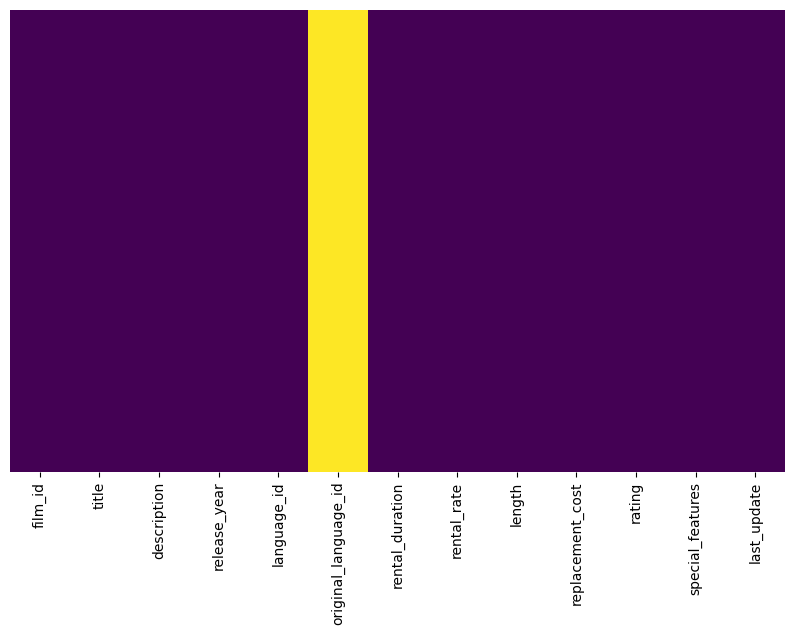

In [27]:
#valores nulos
check_nan(film)

In [28]:
#la columna last_updated es la fecha de la última actualización de la tabla y la vamos a pasar a formato de fecha

film["last_update"] = pd.to_datetime(film["last_update"])

film['release_year'] = pd.to_datetime(film['release_year'], format='%Y').dt.year


In [29]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               1000 non-null   int64         
 1   title                 1000 non-null   object        
 2   description           1000 non-null   object        
 3   release_year          1000 non-null   int64         
 4   language_id           1000 non-null   int64         
 5   original_language_id  0 non-null      float64       
 6   rental_duration       1000 non-null   int64         
 7   rental_rate           1000 non-null   float64       
 8   length                1000 non-null   int64         
 9   replacement_cost      1000 non-null   float64       
 10  rating                1000 non-null   object        
 11  special_features      1000 non-null   object        
 12  last_update           1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1

In [30]:
#eliminamos columna de original_language_id

film = film.drop('original_language_id', axis=1)

In [31]:
film.drop('last_update', axis=1, inplace=True)

In [32]:
film.shape

(1000, 11)

In [33]:
film.language_id.value_counts()

1    1000
Name: language_id, dtype: int64

In [34]:
film.head()

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes"
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes"
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes"
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,Deleted Scenes


**4. Inventory**

In [35]:
inventory.shape

(1000, 4)

In [36]:
inventory.columns

Index(['inventory_id', 'film_id', 'store_id', 'last_update'], dtype='object')

In [37]:
inventory.value_counts()

inventory_id  film_id  store_id  last_update        
1             1        1         2006-02-15 05:09:17    1
672           147      1         2006-02-15 05:09:17    1
659           143      1         2006-02-15 05:09:17    1
660           143      1         2006-02-15 05:09:17    1
661           143      1         2006-02-15 05:09:17    1
                                                       ..
339           75       2         2006-02-15 05:09:17    1
340           75       2         2006-02-15 05:09:17    1
341           75       2         2006-02-15 05:09:17    1
342           76       1         2006-02-15 05:09:17    1
1000          223      2         2006-02-15 05:09:17    1
Length: 1000, dtype: int64

In [38]:
inventory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  1000 non-null   int64 
 1   film_id       1000 non-null   int64 
 2   store_id      1000 non-null   int64 
 3   last_update   1000 non-null   object
dtypes: int64(3), object(1)
memory usage: 97.8 KB


In [39]:
inventory.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17
2,3,1,1,2006-02-15 05:09:17
3,4,1,1,2006-02-15 05:09:17
4,5,1,2,2006-02-15 05:09:17


In [40]:
#comprobamos si no hay duplicados
inventory.drop_duplicates().shape == inventory.shape  

True

In [41]:
inventory.drop('last_update', axis=1, inplace=True)

In [42]:
inventory.shape

(1000, 3)

In [43]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   inventory_id  1000 non-null   int64
 1   film_id       1000 non-null   int64
 2   store_id      1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


**5. Language**

In [44]:
language.columns

Index(['language_id', 'name', 'last_update'], dtype='object')

In [45]:
language.value_counts()

language_id  name      last_update        
1            English   2006-02-15 05:02:19    1
2            Italian   2006-02-15 05:02:19    1
3            Japanese  2006-02-15 05:02:19    1
4            Mandarin  2006-02-15 05:02:19    1
5            French    2006-02-15 05:02:19    1
6            German    2006-02-15 05:02:19    1
dtype: int64

In [46]:
language.shape

(6, 3)

In [47]:
language.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language_id  6 non-null      int64 
 1   name         6 non-null      object
 2   last_update  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 1016.0 bytes


In [48]:
language.head()

,language_id,name,last_update
0,1,English,2006-02-15 05:02:19
1,2,Italian,2006-02-15 05:02:19
2,3,Japanese,2006-02-15 05:02:19
3,4,Mandarin,2006-02-15 05:02:19
4,5,French,2006-02-15 05:02:19


In [49]:
# comprobamos si no hay duplicados

language.drop_duplicates().shape == language.shape  

True

In [50]:
language.drop('last_update', axis=1, inplace=True)

In [51]:
language.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language_id  6 non-null      int64 
 1   name         6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


**6. Old_HDD**

In [52]:
old_HDD.columns

Index(['first_name', 'last_name', 'title', 'release_year', 'category_id'], dtype='object')

In [53]:
old_HDD.value_counts()

first_name  last_name  title                 release_year  category_id
ALEC        WAYNE      ALADDIN CALENDAR      2006          15             1
PENELOPE    GUINESS    ANACONDA CONFESSIONS  2006          2              1
NICK        WAHLBERG   INDIAN LOVE           2006          8              1
                       JEKYLL FROGMEN        2006          13             1
                       JERSEY SASSY          2006          3              1
                                                                         ..
HELEN       VOIGHT     CASPER DRAGONFLY      2006          3              1
                       CAT CONEHEADS         2006          5              1
                       CLASH FREDDY          2006          2              1
                       CUPBOARD SINNERS      2006          6              1
ZERO        CAGE       WORKER TARZAN         2006          16             1
Length: 1000, dtype: int64

In [54]:
old_HDD.shape

(1000, 5)

In [55]:
old_HDD['release_year'] = pd.to_datetime(old_HDD['release_year'], format='%Y').dt.year


In [56]:
old_HDD.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   first_name    1000 non-null   object
 1   last_name     1000 non-null   object
 2   title         1000 non-null   object
 3   release_year  1000 non-null   int64 
 4   category_id   1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 207.6 KB


In [57]:
#comprobamos si no hay duplicados
old_HDD.drop_duplicates().shape == old_HDD.shape  

True

In [58]:
old_HDD.head()

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14


**7. Rental**

In [59]:
rental.shape

(1000, 7)

In [60]:
rental.columns

Index(['rental_id', 'rental_date', 'inventory_id', 'customer_id',
       'return_date', 'staff_id', 'last_update'],
      dtype='object')

In [61]:
rental.value_counts()

rental_id  rental_date          inventory_id  customer_id  return_date          staff_id  last_update        
1          2005-05-24 22:53:30  367           130          2005-05-26 22:04:30  1         2006-02-15 21:30:53    1
673        2005-05-28 22:07:30  1769          468          2005-06-01 23:42:30  1         2006-02-15 21:30:53    1
660        2005-05-28 20:53:31  1414          578          2005-05-30 15:26:31  1         2006-02-15 21:30:53    1
661        2005-05-28 21:01:25  2247          51           2005-06-02 01:22:25  2         2006-02-15 21:30:53    1
662        2005-05-28 21:09:31  2968          166          2005-06-01 19:00:31  2         2006-02-15 21:30:53    1
                                                                                                                ..
340        2005-05-27 03:55:25  946           209          2005-06-04 07:57:25  2         2006-02-15 21:30:53    1
341        2005-05-27 04:01:42  4168          56           2005-06-05 08:51:42  1    

In [62]:
rental.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rental_id     1000 non-null   int64 
 1   rental_date   1000 non-null   object
 2   inventory_id  1000 non-null   int64 
 3   customer_id   1000 non-null   int64 
 4   return_date   1000 non-null   object
 5   staff_id      1000 non-null   int64 
 6   last_update   1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 254.0 KB


In [63]:
#comprobamos si hay duplicados
rental.drop_duplicates().shape == rental.shape  

True

In [64]:
#las columnas que last_update, return_date y rental_date no son necesarias, por lo que las eliminamos

rental.drop('last_update', axis=1, inplace=True)
rental.drop('return_date', axis=1, inplace=True)
rental.drop('rental_date', axis=1, inplace=True)


In [65]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   rental_id     1000 non-null   int64
 1   inventory_id  1000 non-null   int64
 2   customer_id   1000 non-null   int64
 3   staff_id      1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [66]:
rental.head()

,rental_id,inventory_id,customer_id,staff_id
0,1,367,130,1
1,2,1525,459,1
2,3,1711,408,1
3,4,2452,333,2
4,5,2079,222,1


In [67]:
rental.staff_id.value_counts()

2    521
1    479
Name: staff_id, dtype: int64

## Unificación de tabla en una nueva

In [68]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   film_id           1000 non-null   int64  
 1   title             1000 non-null   object 
 2   description       1000 non-null   object 
 3   release_year      1000 non-null   int64  
 4   language_id       1000 non-null   int64  
 5   rental_duration   1000 non-null   int64  
 6   rental_rate       1000 non-null   float64
 7   length            1000 non-null   int64  
 8   replacement_cost  1000 non-null   float64
 9   rating            1000 non-null   object 
 10  special_features  1000 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


In [69]:
old_HDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   first_name    1000 non-null   object
 1   last_name     1000 non-null   object
 2   title         1000 non-null   object
 3   release_year  1000 non-null   int64 
 4   category_id   1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [70]:
#uno las dos tablas para completar la información y poder tener todo en una aprovechando los datos de la antigua base de datos.

new_film = pd.merge(film, old_HDD, on='title')


In [71]:
new_film.head()

,film_id,title,description,release_year_x,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,first_name,last_name,release_year_y,category_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",PENELOPE,GUINESS,2006,6
1,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",CHRISTIAN,GABLE,2006,6
2,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",LUCILLE,TRACY,2006,6
3,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",SANDRA,PECK,2006,6
4,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",BOB,FAWCETT,2006,11


In [72]:
#borramos la columna que se repite 

new_film.drop('release_year_y', axis=1, inplace=True)

In [73]:
#arreglamos el nombre de la columa  release_year_x

new_film.rename(columns={'release_year_x': 'release_year'}, inplace=True)


In [74]:
# con esta tabla nueva podemos trabajar y ahorrarnos las de old_HDD y film, porque quedan integradas

new_film.head()

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,first_name,last_name,category_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",PENELOPE,GUINESS,6
1,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",CHRISTIAN,GABLE,6
2,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",LUCILLE,TRACY,6
3,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",SANDRA,PECK,6
4,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",BOB,FAWCETT,11


In [75]:
new_film.drop_duplicates()

new_film.shape

(1000, 14)

## Dataframes finales

In [76]:
# guardamos los cambios 
actor.to_csv('../data/actor_limpio.csv', index=False)
category.to_csv('../data/category_limpio.csv', index=False)
film.to_csv('../data/film_limpio.csv', index=False)
inventory.to_csv('../data/inventory_limpio.csv', index=False)
language.to_csv('../data/language_limpio.csv', index=False)
old_HDD.to_csv('../data/old_HDD_limpio.csv', index=False)
rental.to_csv('../data/retal_limpio.csv', index=False)

In [77]:
#reseteamos índices

actor.reset_index(drop=True, inplace=True)
category.reset_index(drop=True, inplace=True)
film.reset_index(drop=True, inplace=True)
inventory.reset_index(drop=True, inplace=True)
language.reset_index(drop=True, inplace=True)
old_HDD.reset_index(drop=True, inplace=True)
rental.reset_index(drop=True, inplace=True)

In [78]:
actor.shape

(200, 3)

In [87]:
actor.head()

,actor_id,first_name,last_name
0,1,PENELOPE,GUINESS
1,2,NICK,WAHLBERG
2,3,ED,CHASE
3,4,JENNIFER,DAVIS
4,5,JOHNNY,LOLLOBRIGIDA


In [80]:
# unir las tablas utilizando la función merge
new_film = pd.merge(new_film, actor, on=['first_name', 'last_name'])

In [81]:
new_film.shape


(1000, 15)

In [86]:
new_film.tail(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,first_name,last_name,category_id,actor_id
997,919,TYCOON GATHERING,A Emotional Display of a Husband And a A Shark...,2006,1,3,4.99,82,17.99,G,"Trailers,Commentaries,Deleted Scenes",VIVIEN,BERGEN,10,14
998,948,VOICE PEACH,A Amazing Panorama of a Pioneer And a Student ...,2006,1,6,0.99,139,22.99,PG-13,"Commentaries,Behind the Scenes",VIVIEN,BERGEN,13,14
999,970,WESTWARD SEABISCUIT,A Lacklusture Tale of a Butler And a Husband w...,2006,1,7,0.99,52,11.99,NC-17,"Commentaries,Deleted Scenes",VIVIEN,BERGEN,4,14
